***Importing the dependencies***

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

***Importing the MNIST dataset for digit classification***

*The MNIST database is a large database consisting of images of numbers often used for classification training*

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot = True)

W0804 14:44:21.906900 140093001369472 deprecation.py:323] From <ipython-input-2-4cf8105ac99b>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0804 14:44:21.908698 140093001369472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0804 14:44:21.916080 140093001369472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/train-images-idx3-ubyte.gz


W0804 14:44:22.579874 140093001369472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0804 14:44:22.587257 140093001369472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz


W0804 14:44:22.866836 140093001369472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz


In [0]:
num_training = mnist_data.train.num_examples #55,000
num_testing = mnist_data.test.num_examples #10,000
num_validation = mnist_data.validation.num_examples #5,000
print("MNIST Datasize: Training samples: {0}, Testing samples: {1}, Vaidation sampled: {2}".format(num_training, num_testing, num_validation))

MNIST Datasize: Training samples: 55000, Testing samples: 10000, Vaidation sampled: 5000


***Neural Network parameters***

In [0]:
#architecture of neural network
n_input = 784 #input image of size 28 x 28 pixels
n_hidden_1 = 512 #no of nodes in First hidden layer
n_hidden_2 = 256 #no of nodes in Second hidden layer
n_hidden_3 = 128 #no of nodes in Third hidden layer
n_hidden_4 = 64
n_output =10 #Output layer having (0-9) digits

In [0]:
#hyperparameters - don't change throughout the program
learning_rate = 1e-4 #larger number makes the process faster but values may ted to overshoot the optimal value
epochs = 3000
batch_size = 128
keep_prob = tf.placeholder(tf.float32) #used to implement the dropout feature of hidden layers to avoid overfitting

***Building the tensorflow graph***

In [0]:
#placeholders
X = tf.placeholder(tf.float32, [None, n_input]) #n_input = 784
Y = tf.placeholder(tf.float32, [None, n_output]) #n_output = 10

#weight defination
nn_weight = {"W1" : tf.Variable(tf.random_normal([n_input, n_hidden_1], stddev = 0.1)),
            "W2" : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2], stddev = 0.1)),
            "W3" : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3], stddev = 0.1)),
            "W4" : tf.Variable(tf.random_normal([n_hidden_3, n_hidden_4], stddev=0.1)),
            "Wout" : tf.Variable(tf.random_normal([n_hidden_4, n_output], stddev = 0.1))
            }

nn_bias = { "B1": tf.Variable(tf.random_normal([n_hidden_1])),
           "B2": tf.Variable(tf.random_normal([n_hidden_2])),
           "B3": tf.Variable(tf.random_normal([n_hidden_3])),
           "B4": tf.Variable(tf.random_normal([n_hidden_4])),
           "B5": tf.Variable(tf.random_normal([n_output]))
          }

#Creating the NN model

with tf.name_scope("Network_Model") as scope:
  #layer = (previous_layer * current_weight) + bias (all operations are matrix operations)
  nn_layer_1 = tf.add(tf.matmul(X, nn_weight["W1"]), nn_bias["B1"])
  nn_layer_2 = tf.add(tf.matmul(nn_layer_1, nn_weight["W2"]), nn_bias["B2"])
  nn_layer_3 = tf.add(tf.matmul(nn_layer_2, nn_weight["W3"]), nn_bias["B3"])
  nn_layer_4 = tf.add(tf.matmul(nn_layer_3, nn_weight["W4"]), nn_bias["B4"])
  layer_drop = tf.nn.dropout(nn_layer_4, keep_prob)
  output_layer = tf.nn.sigmoid(output_layer)
  
#Summary report for weights of neural networks
W1_histogram = tf.summary.histogram("W1", nn_weight["W1"])
W2_histogram = tf.summary.histogram("W2", nn_weight["W2"])
W3_histogram = tf.summary.histogram("W3", nn_weight["W3"])
W4_histogram = tf.summary.histogram("W4", nn_weight["W4"])
Wout_histogram = tf.summary.histogram("Wout", nn_weight["Wout"])

#Summary report for weights of neural networks
B1_histogram = tf.summary.histogram("B1", nn_bias["B1"])
B2_histogram = tf.summary.histogram("B2", nn_bias["B2"])
B3_histogram = tf.summary.histogram("B3", nn_bias["B3"])
B4_histogram = tf.summary.histogram("B4", nn_bias["B4"])
B5_histogram = tf.summary.histogram("B5", nn_bias["B5"])

W0804 14:44:38.176834 140093001369472 deprecation.py:506] From <ipython-input-6-752d6787510e>:31: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Define loss
with tf.name_scope("Cost_function") as scope:
  computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels = Y))

#Summary for the cost
network_cost = tf.summary.scalar("Cost", computed_loss)

#Define the optimiser
with tf.name_scope("Network_Optimizer") as scope:
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(computed_loss)

#Define prediction
with tf.name_scope("Network_Prediction") as scope:
  prediction_out = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y,1))

#Define accuracy of the model
with tf.name_scope("Network_Accuracy") as scope:
  nn_accuracy = tf.reduce_mean(tf.cast(prediction_out, tf.float32))

#Initialize all the variables
init = tf.global_variables_initializer()

#Merging all of the summaries
merged_summary = tf.summary.merge_all()

#Saving the model
saver = tf.train.Saver()

print("Model saved")

Model saved


***Executing the computational graph***

In [0]:
with tf.Session() as sess:
  sess.run(init)
  writer = tf.summary.FileWriter("./log", sess.graph)
  for i in range(epochs):
    
    #dataset in mini batches
    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print (mini_batch_x[0:1,:].shape)
    
    #validation datasets in mini batches
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)
    
    #Running the optimizer
    sess.run(optimizer, feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob: 1.0})
    
    #Running the summary
    summary_epoch = sess.run(merged_summary, feed_dict = {X:mini_batch_x, Y: mini_batch_y, keep_prob: 1.0})
    writer.add_summary(summary_epoch, i)
    
    #after every 100th epoch
    if i%100 == 0:
      #testing loss and accuracy
      mini_batch_loss, mini_batch_accuracy =  sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_x, Y: mini_batch_y, keep_prob: 1.0})
      
      #validation loss and accuracy
      mini_batch_val_loss, mini_batch_val_accuracy =  sess.run([computed_loss, nn_accuracy], feed_dict = {X: mini_batch_val_x, Y: mini_batch_val_y, keep_prob: 1.0})
      print("Iterations : {0}, Train_loss: {1}, Train_accuracy: {2}, Val_loss: {3}, Val_accuracy: {4}".format(i, mini_batch_loss, mini_batch_accuracy, mini_batch_val_loss, mini_batch_val_accuracy))
      
  print("Optimization finished")
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X: mnist_data.test.images, Y: mnist_data.test.labels, keep_prob: 1.0})
  print("Testing accuracy is {0}".format(test_accuracy))

  saver_path = saver.save(sess, "./model/my_model.ckpt")
  
  #accuracy can be improved by changing the value of keep_prob only in the train, but in the tetsing phase it is advised to keep the value as 1 because we dont want to drop any features

Iterations : 0, Train_loss: 2.3122127056121826, Train_accuracy: 0.09375, Val_loss: 2.328822374343872, Val_accuracy: 0.046875
Iterations : 100, Train_loss: 2.31663179397583, Train_accuracy: 0.09375, Val_loss: 2.3122425079345703, Val_accuracy: 0.09375
Iterations : 200, Train_loss: 2.2989509105682373, Train_accuracy: 0.1171875, Val_loss: 2.3056533336639404, Val_accuracy: 0.109375
Iterations : 300, Train_loss: 2.301064968109131, Train_accuracy: 0.109375, Val_loss: 2.3304667472839355, Val_accuracy: 0.09375
Iterations : 400, Train_loss: 2.302570343017578, Train_accuracy: 0.1015625, Val_loss: 2.3052849769592285, Val_accuracy: 0.109375
Iterations : 500, Train_loss: 2.3201816082000732, Train_accuracy: 0.0546875, Val_loss: 2.3144843578338623, Val_accuracy: 0.09375
Iterations : 600, Train_loss: 2.3077807426452637, Train_accuracy: 0.078125, Val_loss: 2.3025999069213867, Val_accuracy: 0.109375
Iterations : 700, Train_loss: 2.3098304271698, Train_accuracy: 0.0859375, Val_loss: 2.3178930282592773, Va

***Testing the model***

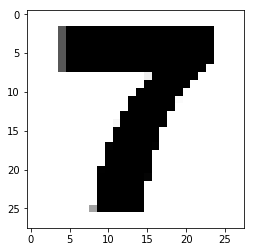

Prediction for test image is [9]


In [0]:
#Upload the test image from outside

img = cv2.imread("7.jpg")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1, -1)/255
dum.shape

with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X: dum, keep_prob: 1.0})
  y_pred = np.argmax(Z, axis = 1)
  print("Prediction for test image is {0}".format(y_pred)) 